In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [270]:
import warnings
warnings.filterwarnings("ignore")

In [271]:
data=pd.read_csv(r"C:\Users\Micro\Downloads\AQI\warangal.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    84 non-null     object
 1   AQI     84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [272]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index(data["Date"],inplace=True)
data.drop(["Date"],axis=1,inplace=True)

In [273]:
original=data.copy()
data=data[:60]

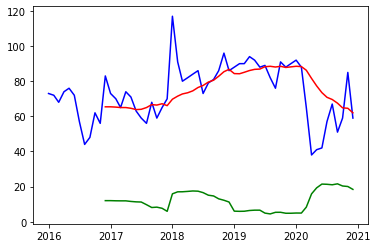

In [274]:
roll_mean = data.rolling(window=12).mean()
roll_std = data.rolling(window=12).std()
plt.plot(data,c='blue')
plt.plot(roll_mean,c='red')
plt.plot(roll_std,c='green')

In [275]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data["AQI"])
print(dftest)

(-3.134807659868625, 0.024082224775650633, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 376.2077541527741)


In [276]:
shift1=data.AQI-data.AQI.shift(1)
print(adfuller(shift2.dropna()))
shift1=pd.DataFrame(shift1)

(-4.773958702954907, 6.097996254471221e-05, 5, 52, {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}, 377.5187120289216)


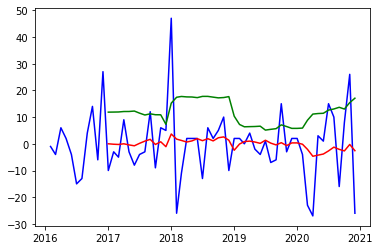

In [277]:
roll_mean = shift1.rolling(window=12).mean()
roll_std = shift1.rolling(window=12).std()
plt.plot(shift1,c='blue')
plt.plot(roll_mean,c='red')
plt.plot(roll_std,c='green')

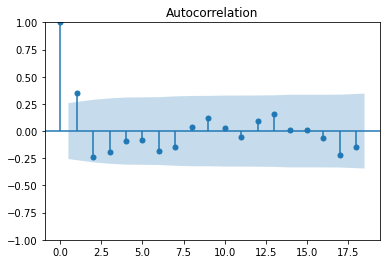

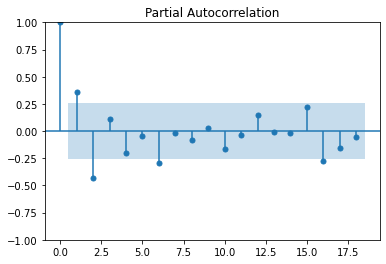

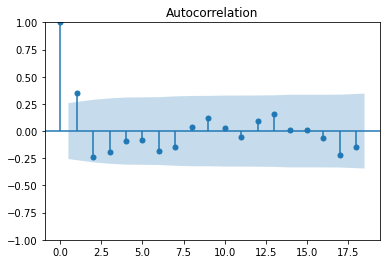

In [278]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(shift2.AQI.dropna())
plot_acf(shift2.AQI.dropna())

In [279]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data,seasonal_order=(2,2,1,6)) 
model_fit = model.fit()

In [280]:
res=model_fit.forecast(24)
res

2021-01-01    69.299087
2021-02-01    76.795454
2021-03-01    51.508174
2021-04-01    34.437746
2021-05-01    56.839607
2021-06-01    36.470307
2021-07-01    54.764655
2021-08-01    68.516694
2021-09-01    46.097957
2021-10-01    45.713493
2021-11-01    78.439650
2021-12-01    45.246693
2022-01-01    62.329788
2022-02-01    74.839342
2022-03-01    46.650850
2022-04-01    32.177813
2022-05-01    63.212445
2022-06-01    32.421582
2022-07-01    54.932182
2022-08-01    71.183784
2022-09-01    43.519539
2022-10-01    36.966795
2022-11-01    74.267075
2022-12-01    35.578344
Freq: MS, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'TESTING AQI-WARANGAL')

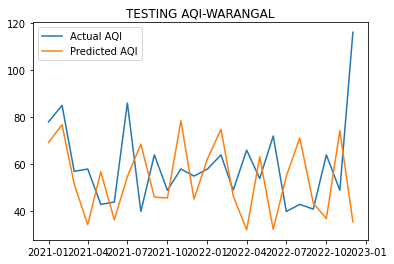

In [281]:
plt.plot(original[60:],label="Actual AQI")
plt.plot(res,label="Predicted AQI")
plt.legend()
plt.title("TESTING AQI-WARANGAL")

In [282]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(original.AQI[60:].values,res)

0.3084394931356839